In [1]:
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

## Load the data

In [2]:
house_prices_train = pd.read_csv('train.csv')
house_prices_test = pd.read_csv('test.csv')
pd.set_option('display.max_columns', 300)
house_prices_train.head(5)
print house_prices_train.shape, house_prices_test.shape

(1460, 81) (1459, 80)


In [3]:
house_prices_all = pd.concat((house_prices_train.loc[:,'MSSubClass':'SaleCondition'], 
                              house_prices_test.loc[:,'MSSubClass':'SaleCondition']))
house_prices_all.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


## Data Preprocessing

In [4]:
house_prices_all.shape

(2919, 79)

In [5]:
house_prices_all = house_prices_all.reset_index(drop=True)
house_prices_all.index
house_prices_all.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [6]:
house_prices_all.index

RangeIndex(start=0, stop=2919, step=1)

#### Lets look into null values

In [7]:
x = house_prices_all.isnull().sum().sort_values(ascending=False)
print x[x>0] #columns with many number of nulls
print x[x>0].index.values

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior1st        1
SaleType           1
Electrical         1
KitchenQual        1
GarageArea         1
GarageCars         1
dtype: int64
['PoolQC' 'MiscFeature' 'Alley' 'Fence' 'FireplaceQu' 'LotFrontage'
 'GarageCond' 'GarageQual' 'GarageYrBlt' 'GarageFinish' 'GarageType'
 'BsmtCond' 'BsmtExposure' 'BsmtQual' 'BsmtFinType2' 'BsmtFinType1'
 'MasVnrType' 'MasVnrArea' 'MSZoning' 'BsmtHalfBath' 'Utilities'
 'F

Lets look into these columns with large number of null values in more detail

In [8]:
print house_prices_all[(house_prices_all.PoolArea==0) | (house_prices_all.PoolArea.isnull())].shape[0]
print house_prices_all[(house_prices_all.Fireplaces==0) | (house_prices_all.Fireplaces.isnull())].shape[0]
print house_prices_all[(house_prices_all.TotalBsmtSF==0) | (house_prices_all.TotalBsmtSF.isnull())].shape[0]
print house_prices_all[(house_prices_all.TotalBsmtSF.isnull())].shape[0]
print house_prices_all[(house_prices_all.GarageArea==0) | (house_prices_all.GarageArea.isnull())].shape[0]
print house_prices_all[(house_prices_all.GarageArea.isnull())].shape[0]

2906
1420
79
1
158
1


* 2906 houses have no pools and 2909 have PoolQC as null -> 3 datasets are missing PoolQC data
* 1420 houses have no fireplaces and 1420 have FireplaceQu as null -> 0 datasets are missing FireplaceQu data
* 78 houses have no basement, 1 has null and between 79 and 82 of them have basement features as null -> 1-4 have data missing
* 157 houses have no garage, 1 has null and 159 have Garage features null -> 2 are missing data
* 23 houses have MasVnrArea of null and 24 have MasVnrType as null -> 1 missing data.
* For MiscFeature which is Miscellaneous feature, I will do one-hot encoding first and then fill the value with MiscVal.
* (I spot checked a few data points and the datas corresponding to Areas of 0 and null related features have the same indices).

In [9]:
print house_prices_all[house_prices_all.BsmtCond.isnull() & house_prices_all.TotalBsmtSF!=0].index
print house_prices_all[house_prices_all.BsmtExposure.isnull() & house_prices_all.TotalBsmtSF!=0].index
print house_prices_all[house_prices_all.BsmtQual.isnull() & house_prices_all.TotalBsmtSF!=0].index
print house_prices_all[house_prices_all.BsmtFinType2.isnull() & house_prices_all.TotalBsmtSF!=0].index
print house_prices_all[house_prices_all.BsmtFinType1.isnull() & house_prices_all.TotalBsmtSF!=0].index
print house_prices_all[house_prices_all.TotalBsmtSF.isnull()].index # should we drop this guy?
print house_prices_all[house_prices_all.GarageArea.isnull()].index # should we drop this guy?
house_prices_all.loc[[2576],house_prices_all.filter(regex='Garage').columns.values] #This one has all Garage Info missing except for GarageType

Int64Index([2040, 2185, 2524], dtype='int64')
Int64Index([948, 1487, 2348], dtype='int64')
Int64Index([2217, 2218], dtype='int64')
Int64Index([332], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([2120], dtype='int64')
Int64Index([2576], dtype='int64')


,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
2576,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


The data points with null values for Basement Area and Garage Area are in test set based on the index. So we can't drop them. Lets make them 0 and for the data in index 2576 lets make its GarageType as null since its GarageArea is null.

In [10]:
house_prices_all.loc[[2576],['GarageArea']] = 0
house_prices_all.loc[[2576],['GarageType']] = np.nan
house_prices_all.loc[[2120],['TotalBsmtSF']] = 0

In [11]:
print house_prices_all.loc[[2576],['GarageArea']]
print house_prices_all.loc[[2576],['GarageType']]
print house_prices_all.loc[[2120],['TotalBsmtSF']]

      GarageArea
2576         0.0
     GarageType
2576        NaN
      TotalBsmtSF
2120          0.0


There are a small number of datapoints that are missing basement, garage, and other features and I am going to leave the most of them as they are. Once we do one-hot encoding, they will simply get assigned 0. There are some features, such as LotFrontage, that I will look to fix. Some like Alley/Fence have NaN if they have no Alley/Fence so its fine.

In [12]:
['MiscFeature' ,'LotFrontage', 'Utilities']

['MiscFeature', 'LotFrontage', 'Utilities']

In [13]:
print house_prices_all['Utilities'].value_counts() #lets drop it
house_prices_all.drop(['Utilities'], axis=1, inplace=True)

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64


In [14]:
house_prices_all = pd.get_dummies(house_prices_all, columns=['MiscFeature'])

In [15]:
house_prices_all.loc[:,house_prices_all.filter(regex='Misc').columns.values].head(10)

,MiscVal,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,700,0,0,1,0
6,0,0,0,0,0
7,350,0,0,1,0
8,0,0,0,0,0
9,0,0,0,0,0


In [16]:
temp = [x for x in house_prices_all.filter(regex='Misc').columns.values if x != 'MiscVal']
for x in temp:
    house_prices_all[x] = house_prices_all[x] * house_prices_all['MiscVal']

In [17]:
house_prices_all.loc[:,house_prices_all.filter(regex='Misc').columns.values].head(10)

,MiscVal,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,700,0,0,700,0
6,0,0,0,0,0
7,350,0,0,350,0
8,0,0,0,0,0
9,0,0,0,0,0


In [18]:
house_prices_all[temp + ['MiscVal']][house_prices_all.MiscFeature_Gar2!=0]

,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscVal
346,15500,0,0,0,15500
1230,8300,0,0,0,8300
1461,12500,0,0,0,12500
2194,3000,0,0,0,3000
2790,4500,0,0,0,4500


In [19]:
house_prices_all.drop(['MiscVal'], axis=1, inplace=True)

**Lets look into what more numerical features are still null**

In [20]:
numerical_features = house_prices_all.columns[house_prices_all.dtypes != object]
numerical_features

Index([u'MSSubClass', u'LotFrontage', u'LotArea', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'MasVnrArea',
       u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'TotRmsAbvGrd', u'Fireplaces', u'GarageYrBlt',
       u'GarageCars', u'GarageArea', u'WoodDeckSF', u'OpenPorchSF',
       u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MoSold',
       u'YrSold', u'MiscFeature_Gar2', u'MiscFeature_Othr',
       u'MiscFeature_Shed', u'MiscFeature_TenC'],
      dtype='object')

In [21]:
x = house_prices_all[numerical_features].isnull().sum().sort_values(ascending=False)
x[x>0]

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtFullBath      2
BsmtHalfBath      2
GarageCars        1
BsmtUnfSF         1
BsmtFinSF1        1
BsmtFinSF2        1
dtype: int64

* LotFrontage: Lets replace nulls with median from the neighborhood LotFrontage
* GarageYrBlt: 158 have no Garage. 1 has Garage but no data on YrBlt. Lets replace it with u'YearBuilt'.
* MasVnrArea: Replace these with 0
* BsmtFullBath, BsmtFullBath: Lets look at what the basement size is and decide
* GarageCars: Lets look at GarageArea and decide
* BsmtUnfSF, BsmtFinSF1, BsmtFinSF2: Lets look at Total Basement Area and decide

In [22]:
house_prices_all[(house_prices_all.GarageYrBlt.isnull()) & (house_prices_all.GarageArea!=0)].index

Int64Index([2126], dtype='int64')

In [23]:
house_prices_all.loc[[2126], house_prices_all.filter(regex='Garage').columns.values]
#house_prices_all.loc[[2126], ['YearBuilt']]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
2126,Detchd,NaN,NaN,1.0,360.0,NaN,NaN


In [24]:
house_prices_all.loc[[2126], ['GarageYrBlt']] = house_prices_all.loc[[2126], ['YearBuilt']].values

In [25]:
house_prices_all.loc[[2126], house_prices_all.filter(regex='Garage').columns.values]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
2126,Detchd,1910.0,NaN,1.0,360.0,NaN,NaN


In [26]:
temp = house_prices_all[(house_prices_all.MasVnrArea.isnull())].index.values

In [27]:
house_prices_all.loc[temp, ['MasVnrArea']] = 0
house_prices_all[(house_prices_all.MasVnrArea.isnull())].index.values

array([], dtype=int64)

In [28]:
print house_prices_all[(house_prices_all.BsmtFullBath.isnull())].index
print house_prices_all[(house_prices_all.BsmtHalfBath.isnull())].index
print house_prices_all[(house_prices_all.BsmtUnfSF.isnull())].index
print house_prices_all[(house_prices_all.BsmtFinSF1.isnull())].index
print house_prices_all[(house_prices_all.BsmtFinSF2.isnull())].index

Int64Index([2120, 2188], dtype='int64')
Int64Index([2120, 2188], dtype='int64')
Int64Index([2120], dtype='int64')
Int64Index([2120], dtype='int64')
Int64Index([2120], dtype='int64')


In [29]:
house_prices_all.loc[[2120,2188], house_prices_all.filter(regex='Bsmt').columns.values]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
2120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2188,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN


Lets replace the basement features with 0 since basement size is 0.

In [30]:
house_prices_all.loc[[2120,2188], ['BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2']] = 0
house_prices_all.loc[[2120,2188], house_prices_all.filter(regex='Bsmt').columns.values]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
2120,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
2188,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [31]:
house_prices_all[(house_prices_all.GarageCars.isnull())].index

Int64Index([2576], dtype='int64')

In [32]:
house_prices_all.loc[[2576], house_prices_all.filter(regex='Garage').columns.values]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
2576,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [33]:
house_prices_all.loc[[2576], ['GarageCars']]=0
house_prices_all.loc[[2576], house_prices_all.filter(regex='Garage').columns.values]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
2576,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [34]:
operation = {'LotFrontage':['median','mean']}
house_prices_all.groupby(['Neighborhood'])['LotFrontage'].agg(operation).head(50)

LotFrontage           
                  median       mean
Neighborhood                       
Blmngtn             43.0  46.900000
Blueste             24.0  27.300000
BrDale              21.0  21.500000
BrkSide             51.0  55.789474
ClearCr             80.5  88.150000
CollgCr             70.0  71.336364
Crawfor             70.0  69.951807
Edwards             65.0  66.910112
Gilbert             64.0  74.207207
IDOTRR              60.0  62.241379
MeadowV             21.0  25.606061
Mitchel             74.0  75.144444
NAmes               73.0  75.210667
NPkVill             24.0  28.142857
NWAmes              80.0  81.517647
NoRidge             89.0  91.629630
NridgHt             92.0  84.184049
OldTown             60.0  61.777293
SWISU               60.0  59.068182
Sawyer              72.0  74.551020
SawyerW             67.0  70.669811
Somerst             72.5  64.549383
StoneBr             60.0  62.173913
Timber              82.0  81.157895
Veenker             80.0  72.000000

In [35]:
neighborhood_LotFrontage_median = house_prices_all.groupby(['Neighborhood'])['LotFrontage'].median()

In [36]:
#house_prices_all['LotFrontage'].fillna(neighborhood_LotFrontage_median[house_prices_all['Neighborhood']])
null_lotFrontage = house_prices_all[house_prices_all['LotFrontage'].isnull()].index

In [37]:
house_prices_all.loc[null_lotFrontage, ['Neighborhood']].head(10)

,Neighborhood
7,NWAmes
12,Sawyer
14,NAmes
16,NAmes
24,Sawyer
31,Sawyer
42,SawyerW
43,CollgCr
50,Gilbert
64,CollgCr


In [38]:
temp = house_prices_all.loc[null_lotFrontage, ['Neighborhood']]
neighborhood_LotFrontage_median[temp['Neighborhood']].shape

(486,)

In [39]:
for i in null_lotFrontage:
    neighborhood = house_prices_all.loc[[i], ['Neighborhood']]
    LotFrontage = neighborhood_LotFrontage_median[neighborhood['Neighborhood']]
    neighborhood = house_prices_all.loc[[i], ['LotFrontage']] = LotFrontage[0]

In [40]:
house_prices_all.loc[null_lotFrontage, ['LotFrontage', 'Neighborhood']].head(5)

,LotFrontage,Neighborhood
7,80.0,NWAmes
12,72.0,Sawyer
14,73.0,NAmes
16,73.0,NAmes
24,72.0,Sawyer


In [41]:
null_lotFrontage = house_prices_all[house_prices_all['LotFrontage'].isnull()].index
null_lotFrontage

Int64Index([], dtype='int64')

In [42]:
x = house_prices_all[numerical_features].isnull().sum().sort_values(ascending=False)
x[x>0]

GarageYrBlt    158
dtype: int64

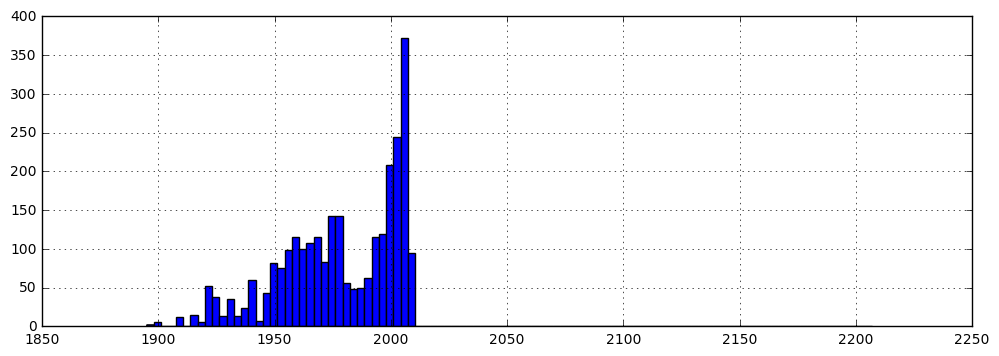

In [43]:
house_prices_all['GarageYrBlt'].hist(bins=100)

In [44]:
# Lets just drop GarageYrBlt - I can't see this being important
house_prices_all.drop(['GarageYrBlt'], axis=1, inplace=True)

#### Lets look into features some more

In [45]:
numerical_features = house_prices_all.columns[house_prices_all.dtypes != object]
numerical_features

Index([u'MSSubClass', u'LotFrontage', u'LotArea', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'MasVnrArea',
       u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'TotRmsAbvGrd', u'Fireplaces', u'GarageCars',
       u'GarageArea', u'WoodDeckSF', u'OpenPorchSF', u'EnclosedPorch',
       u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MoSold', u'YrSold',
       u'MiscFeature_Gar2', u'MiscFeature_Othr', u'MiscFeature_Shed',
       u'MiscFeature_TenC'],
      dtype='object')

In [46]:
house_prices_all['MSSubClass'].dtypes

dtype('int64')

MSSubClass is a categorical feature, but it is considered numerical. Lets convert categorical features that might be incorrectly considered numerical to be categorical.

In [47]:
house_prices_all['MSSubClass'] = house_prices_all['MSSubClass'].astype('object')

In [48]:
house_prices_all['MSSubClass'].dtypes

dtype('O')

In [49]:
house_prices_all.get_dtype_counts()

float64    10
int64      27
object     42
dtype: int64

In [50]:
numerical_features = house_prices_all.columns[house_prices_all.dtypes != object]
numerical_features

Index([u'LotFrontage', u'LotArea', u'OverallQual', u'OverallCond',
       u'YearBuilt', u'YearRemodAdd', u'MasVnrArea', u'BsmtFinSF1',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF', u'2ndFlrSF',
       u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath',
       u'FullBath', u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr',
       u'TotRmsAbvGrd', u'Fireplaces', u'GarageCars', u'GarageArea',
       u'WoodDeckSF', u'OpenPorchSF', u'EnclosedPorch', u'3SsnPorch',
       u'ScreenPorch', u'PoolArea', u'MoSold', u'YrSold', u'MiscFeature_Gar2',
       u'MiscFeature_Othr', u'MiscFeature_Shed', u'MiscFeature_TenC'],
      dtype='object')

In [51]:
house_prices_all['FireplaceQu'].value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [52]:
categorical_features = house_prices_all.columns[house_prices_all.dtypes == object]
categorical_features

Index([u'MSSubClass', u'MSZoning', u'Street', u'Alley', u'LotShape',
       u'LandContour', u'LotConfig', u'LandSlope', u'Neighborhood',
       u'Condition1', u'Condition2', u'BldgType', u'HouseStyle', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2', u'Heating',
       u'HeatingQC', u'CentralAir', u'Electrical', u'KitchenQual',
       u'Functional', u'FireplaceQu', u'GarageType', u'GarageFinish',
       u'GarageQual', u'GarageCond', u'PavedDrive', u'PoolQC', u'Fence',
       u'SaleType', u'SaleCondition'],
      dtype='object')

### Lets address skewness

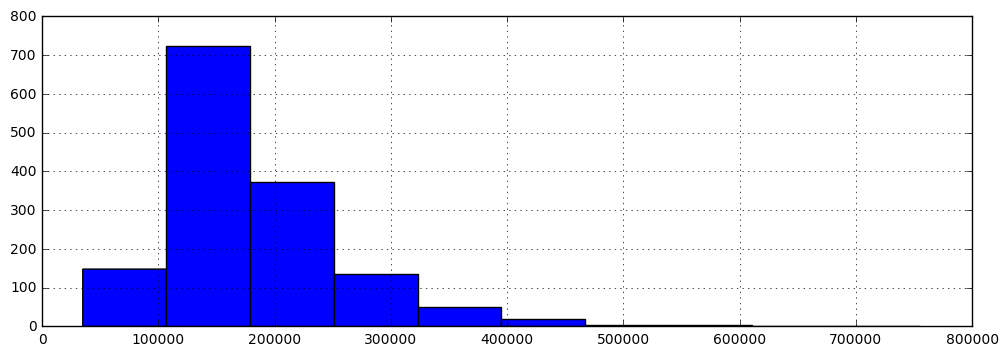

In [53]:
plot = house_prices_train['SalePrice'].hist()

In [54]:
stats.skew(house_prices_train['SalePrice'])

1.880940746034036

Output variable is skewed so lets log transform it!

In [55]:
house_prices_train['log_SalePrice'] = house_prices_train['SalePrice'].apply(lambda x: np.log1p(x))
stats.skew(house_prices_train['log_SalePrice'])

0.12122191311528359

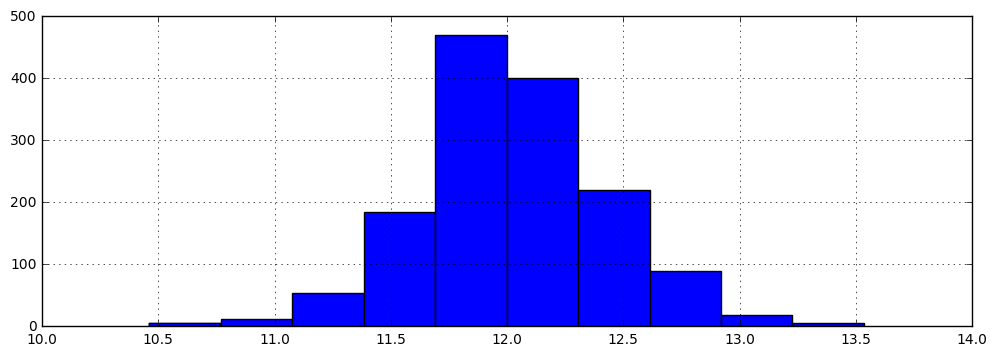

In [56]:
plot = house_prices_train['log_SalePrice'].hist() #Looks much better!

#### Lets transform skewed features as well

In [57]:
stats.skew(house_prices_all[numerical_features])

array([  1.50570384,  12.8224314 ,   0.19711045,   0.57031205,
        -0.59980555,  -0.45102038,   2.61359213,   1.42523018,
         4.14614327,   0.91933923,   1.15689414,   1.46960442,
         0.86167475,  12.088761  ,   1.26935769,   0.62483211,
         3.93159384,   0.16760573,   0.69456649,   0.32632435,
         4.30225437,   0.75836691,   0.7334946 ,  -0.21958095,
         0.23925692,   1.84243281,   2.53511373,   4.00389122,
        11.37606468,   3.9466937 ,  16.89832792,   0.19588394,
         0.13239881,  31.22180852,  36.74258435,  11.90038387,  54.00000317])

In [58]:
skewed_features = house_prices_all[numerical_features].columns[np.absolute(stats.skew(house_prices_all[numerical_features]))>0.8]
print skewed_features

Index([u'LotFrontage', u'LotArea', u'MasVnrArea', u'BsmtFinSF1', u'BsmtFinSF2',
       u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF',
       u'GrLivArea', u'BsmtHalfBath', u'KitchenAbvGr', u'WoodDeckSF',
       u'OpenPorchSF', u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch',
       u'PoolArea', u'MiscFeature_Gar2', u'MiscFeature_Othr',
       u'MiscFeature_Shed', u'MiscFeature_TenC'],
      dtype='object')


In [59]:
house_prices_all[skewed_features] = house_prices_all[skewed_features].apply(lambda x: np.log1p(x))
house_prices_all.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,60,RL,4.189655,9.042040,Pave,NaN,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.0,5.017280,6.753438,GasA,Ex,Y,SBrkr,6.753438,6.751101,0.0,7.444833,1.0,0.000000,2,1,3,0.693147,Gd,8,Typ,0,NaN,Attchd,RFn,2.0,548.0,TA,TA,Y,0.000000,4.127134,0.0,0.0,0.0,0.0,NaN,NaN,2,2008,WD,Normal,0.0,0.0,0.0,0.0
1,20,RL,4.394449,9.169623,Pave,NaN,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.0,5.652489,7.141245,GasA,Ex,Y,SBrkr,7.141245,0.000000,0.0,7.141245,0.0,0.693147,2,0,3,0.693147,TA,6,Typ,1,TA,Attchd,RFn,2.0,460.0,TA,TA,Y,5.700444,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,5,2007,WD,Normal,0.0,0.0,0.0,0.0


In [60]:
stats.skew(house_prices_all[numerical_features])

array([ -1.02360607e+00,  -5.04750551e-01,   1.97110449e-01,
         5.70312050e-01,  -5.99805548e-01,  -4.51020377e-01,
         5.37018191e-01,  -6.16631873e-01,   2.46248318e+00,
        -2.15520551e+00,  -4.95629360e+00,   6.48276816e-02,
         3.05049216e-01,   8.55769042e+00,   1.31875818e-02,
         6.24832114e-01,   3.77476201e+00,   1.67605733e-01,
         6.94566495e-01,   3.26324349e-01,   3.52035064e+00,
         7.58366906e-01,   7.33494599e-01,  -2.19580951e-01,
         2.39256920e-01,   1.58033001e-01,  -4.17973041e-02,
         1.96108059e+00,   8.82525577e+00,   2.94590513e+00,
         1.49983347e+01,   1.95883943e-01,   1.32398815e-01,
         2.42702497e+01,   3.12214532e+01,   5.41923873e+00,
         5.40000032e+01])

In [61]:
print house_prices_all[numerical_features].columns[np.absolute(stats.skew(house_prices_all[numerical_features]))>0.8].values

['LotFrontage' 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF' 'LowQualFinSF'
 'BsmtHalfBath' 'KitchenAbvGr' 'EnclosedPorch' '3SsnPorch' 'ScreenPorch'
 'PoolArea' 'MiscFeature_Gar2' 'MiscFeature_Othr' 'MiscFeature_Shed'
 'MiscFeature_TenC']


Many features are still skewed ... we might need to deal with them later!

### One hot encoding for categorical variables

In [62]:
house_prices_all.shape

(2919, 79)

In [63]:
pd.set_option('display.max_columns', 300)
house_prices_all = pd.get_dummies(house_prices_all)
house_prices_all.head(1)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,Firepla

In [64]:
house_prices_all.shape

(2919, 299)

In [65]:
train = house_prices_all[0:len(house_prices_train)]
test = house_prices_all[len(house_prices_train):]
output = house_prices_train['log_SalePrice']
print train.shape, test.shape, output.shape

(1460, 299) (1459, 299) (1460,)


### Lets save above to csv so they can be retrieved from file system

In [66]:
train.to_csv('train_engineered2.csv', index=False)
test.to_csv('test_engineered2.csv', index=False)
output.to_csv('log_SalePrice2.csv', index=False)